In [1]:
# importing required libraries
import twint        # to scrape twitter data without restrictions
import tweepy     # to scrape user profile information
import nest_asyncio # to solve dependencies for twint
import json         # to read and convert tweets to json files
import numpy as np  # for computations
import pandas as pd # to work with pandas dataframe
import re           # to clean the data
import preprocessor as s
import nltk
from datetime import date
import calendar
import matplotlib.pyplot as plt
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import tensorflow as tf
from transformers import pipeline
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nest_asyncio.apply() 

# THRID PART

In [2]:
# twint give users two options to scrape data: by cmd and by python script
# for this example i have used cmd to scrape data for all three companies. the query used it given below
"""
twint -u pepsi --lang en --limit 5000 --count -o pepsi_final.json --json
twint -u cocacola --lang en --limit 5000 --count -o cocacola_final.json --json
twint -u sprite --lang en --limit 5000 --count -o sprite_final.json --json


twint -g="37.0902, -95.7129,2000km" -s "sprite" --lang en --limit 5000 --count -o geo_data_usa_sprite.json --json
twint -g="37.0902, -95.7129,2000km" -s "pepsi" --lang en --limit 5000 --count -o geo_data_usa_pepsi.json --json
twint -g="37.0902, -95.7129,2000km" -s "cocacola" --lang en --limit 5000 --count -o geo_data_usa_cocacola.json --json

twint -s "pepsi" --verified --lang en --since 2021-04-01 --count -o demotry.json --json
twint -s "cocacola" --verified --lang en --since 2021-04-01 --count -o demotry.json --json
twint -s "sprite" --verified --lang en --since 2021-04-01 --count -o demotry.json --json

"""
df_pepsi = pd.read_json('D:/SP Jain Year 3/Semester 6/Social Web Analytics/twint-master/twint-master/pepsi_verified_since_april2021.json', lines=True)
df_cocacola = pd.read_json('D:/SP Jain Year 3/Semester 6/Social Web Analytics/twint-master/twint-master/cocacola_verified_since_april2021.json', lines=True)
df_sprite = pd.read_json('D:/SP Jain Year 3/Semester 6/Social Web Analytics/twint-master/twint-master/sprite_verified_since_april2021.json', lines=True)

In [3]:
# printing shapes of the scraped df
full_df_list = [df_pepsi,df_cocacola,df_sprite]
for i in full_df_list:
    print(i.shape)

(3427, 36)
(2752, 36)
(698, 36)


In [6]:
# extracting tweets by the respective companies
# twint doesn't allow to scrape just tweets instead it scrapes "tweets and replies" 
# the below code filters out all the tweets made by the company and not just replies

l_bool_pepsi = []
for i in range(len(df_pepsi)):
    l_bool_pepsi.append(df_pepsi.loc[i,]['username'] != 'pepsi')
new_df_pepsi = df_pepsi[l_bool_pepsi]

l_bool_cocacola = []
for i in range(len(df_cocacola)):
    l_bool_cocacola.append(df_cocacola.loc[i,]['username'] != 'cocacola')
new_df_cocacola = df_cocacola[l_bool_cocacola]

l_bool_sprite = []
for i in range(len(df_sprite)):
    l_bool_sprite.append(df_sprite.loc[i,]['username'] != 'sprite')
new_df_sprite = df_sprite[l_bool_sprite]

full_new_df_list = [new_df_pepsi,new_df_cocacola,new_df_sprite]
for i in full_new_df_list:
    print(i.shape)
    

# the results show that pepsi is the brand that engages with consumers the most in comparison to other brands.
# however sprite focuses more on promotions by tweeting frequently and is less engaged with the consumers



(3022, 36)
(2392, 36)
(622, 36)


In [9]:
# FILTER FOR ENGLISH LANGUAGE TEXT USING THE TEXTBLOB FUNCTION
tex = 'Check out Dallas based fashion and portrait photographer Angela Webb () who specializes in bringing authentic, political and color striking images that center around the unique beauty and culture of women of color.'
wnl = WordNetLemmatizer()
def clean_text(x):
    
    tweet_text = x.lower()
    tweet_text = s.clean(tweet_text)
    tweet_text = re.sub(r'[^a-zA-Z ]+', '',tweet_text)
    tweet_text = nltk.word_tokenize(tweet_text)
    tweet_text = [w for w in tweet_text if w not in stopwords.words('english')]
    tweet_text = ' '.join([wnl.lemmatize(words) for words in tweet_text]) # without pos tagging
    return tweet_text

In [10]:
sentiment_analysis = pipeline("sentiment-analysis")
for i in full_new_df_list:
    i['cleaned_tweets'] = i['tweet'].apply(lambda x: clean_text(x))
    i['tokenized_comments'] = i['cleaned_tweets'].apply(lambda x: nltk.word_tokenize(x))
    i["Day_of_week"] = i["date"].apply(lambda x: calendar.day_name[x.weekday()])
    i['polarity_from_blob'] = i['cleaned_tweets'].apply(lambda x: TextBlob(clean_text(x)).sentiment[0]) 
    i['subjectivity'] = i['cleaned_tweets'].apply(lambda x: TextBlob(clean_text(x)).sentiment[1])
    i['transformer_score'] = i['cleaned_tweets'].apply(lambda x: sentiment_analysis(x))
    i.reset_index(drop=True, inplace=True)

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
D:\anaconda3

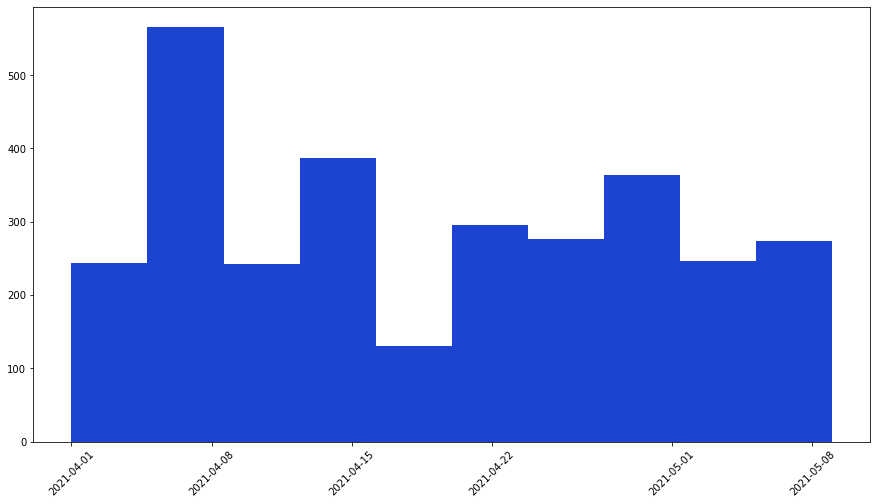

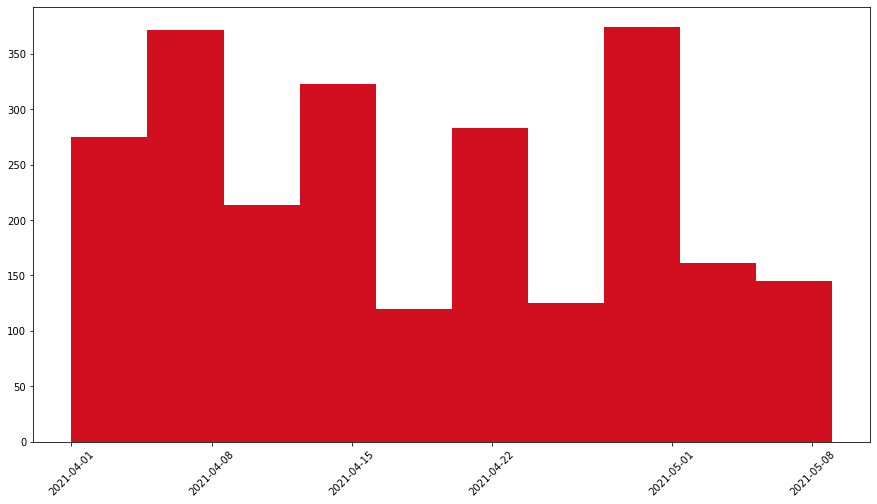

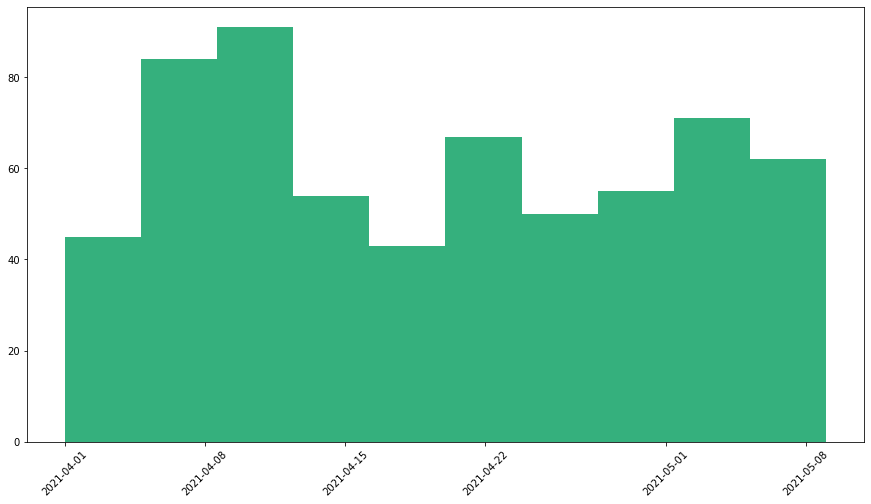

In [24]:
# "#1d44d1","#d10f1f","#35b07d"
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.hist(x=new_df_pepsi['date'],color=colors_for_bar[0])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15,8))
plt.hist(x=new_df_cocacola['date'],color=colors_for_bar[1])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15,8))
plt.hist(x=new_df_sprite['date'],color=colors_for_bar[2])
plt.xticks(rotation=45)
plt.show()

In [12]:
from collections import Counter
sam = [len(i) for i in new_df_pepsi['mentions']]
print(Counter(sam))

sam1 = [len(i) for i in new_df_cocacola['mentions']]
print(Counter(sam1))

sam2 = [len(i) for i in new_df_sprite['mentions']]
print(Counter(sam2))

"""
all 3 brands don't mention many people in their comments
"""

Counter({0: 2544, 1: 273, 2: 108, 3: 39, 4: 25, 6: 13, 7: 6, 5: 5, 8: 4, 10: 1, 18: 1, 14: 1, 9: 1, 12: 1})
Counter({0: 1269, 1: 527, 2: 247, 3: 150, 4: 77, 6: 53, 5: 30, 7: 17, 9: 9, 8: 4, 11: 4, 10: 2, 17: 1, 15: 1, 13: 1})
Counter({0: 486, 1: 61, 2: 41, 3: 22, 4: 5, 5: 3, 6: 3, 7: 1})


"\nall 3 brands don't mention many people in their comments\n"

In [13]:
count = 0
for i in new_df_pepsi['photos']:
    if i != []:
        count+=1
print(count/len(new_df_pepsi['photos'])*100)

count = 0
for i in new_df_cocacola['photos']:
    if i != []:
        count+=1
print(count/len(new_df_cocacola['photos'])*100)

count = 0
for i in new_df_sprite['photos']:
    if i != []:
        count+=1
print(count/len(new_df_sprite['photos'])*100)

"""
sprite uses most images across all other brands

"""

16.082064857710126
22.36622073578595
21.382636655948552


'\nsprite uses most images across all other brands\n\n'

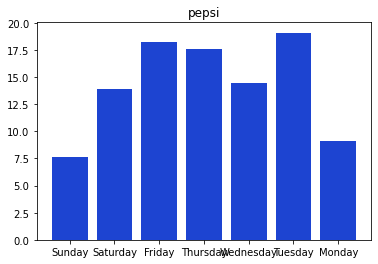

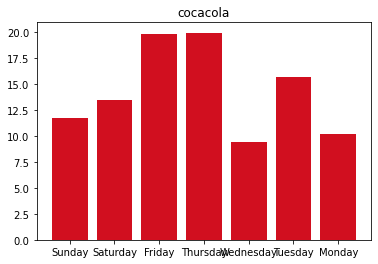

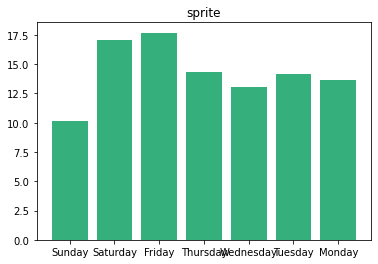

In [21]:
t = ["pepsi","cocacola","sprite"]
colors_for_bar = ["#1d44d1","#d10f1f","#35b07d"]

for i,j,k in zip(full_new_df_list,colors_for_bar,t):
    trying = dict(Counter(i.Day_of_week))
    plt.bar(trying.keys(),[i/sum(trying.values())*100 for i in trying.values()],color=j)
    plt.title(f"{k}")
    plt.show()
 

**************


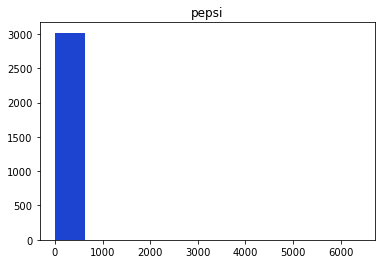

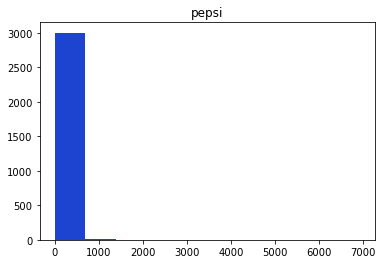

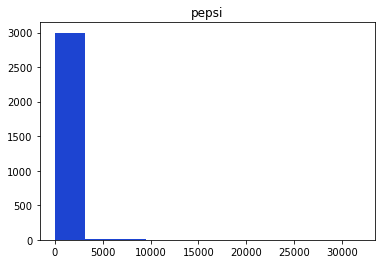

**************


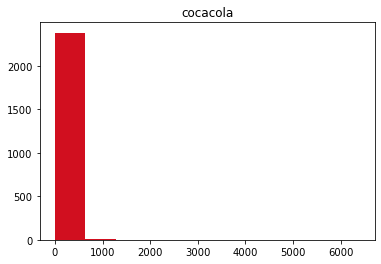

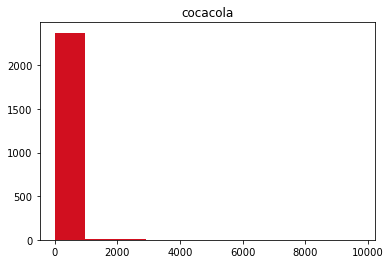

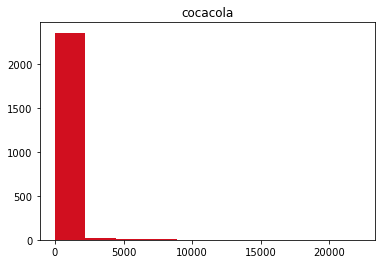

**************


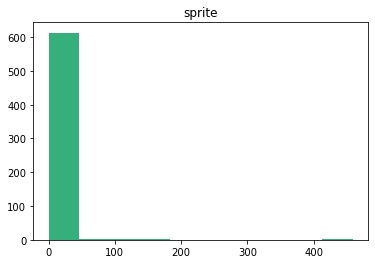

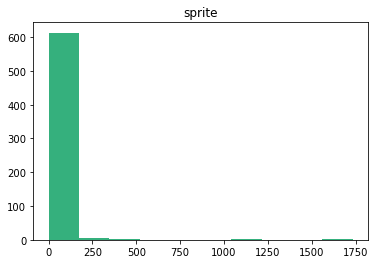

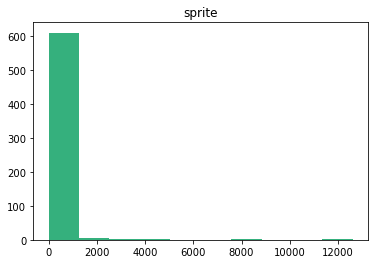

In [22]:
# for i in new_df_cocacola['replies_count']:
#     print(i)
for i,j,k in zip(full_new_df_list,colors_for_bar,t):
    print("**************")
    plt.hist(i['replies_count'],color=j)
    plt.title(f"{k}")
    plt.show()

    plt.hist(i['retweets_count'],color=j)
    plt.title(f"{k}")
    plt.show()

    plt.hist(i['likes_count'],color=j)
    plt.title(f"{k}")
    plt.show()
# plt.boxplot(new_df_cocacola['replies_count'])
# plt.show()
# new_df_pepsi['replies_count'].sum()/len(new_df_pepsi['replies_count'])

*****************


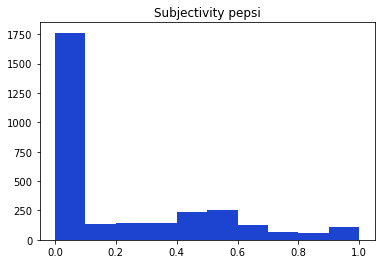

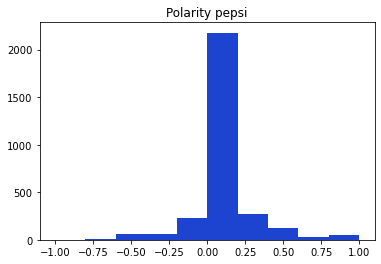

*****************


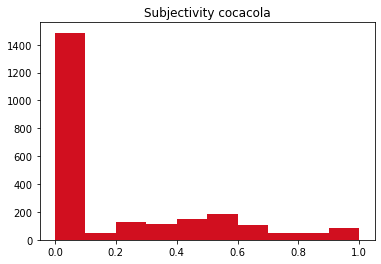

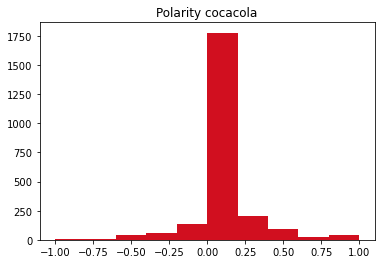

*****************


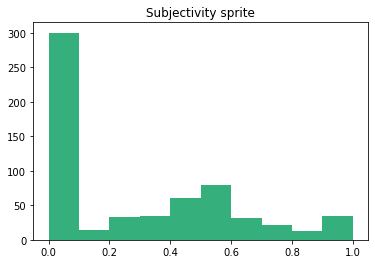

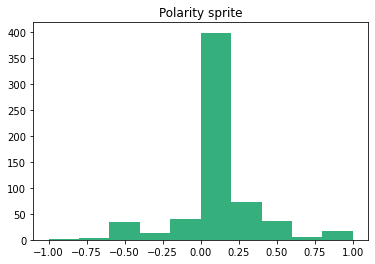

In [23]:
for i,j,k in zip(full_new_df_list,colors_for_bar,t):
    print("*****************")
    plt.hist(i['subjectivity'],color=j)
    plt.title(f'Subjectivity {k}')
    plt.show()
    plt.hist(i['polarity_from_blob'],color=j)
    plt.title(f'Polarity {k}')
    plt.show()

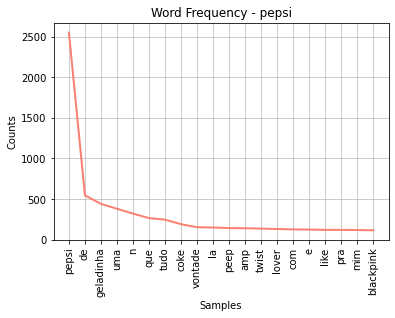

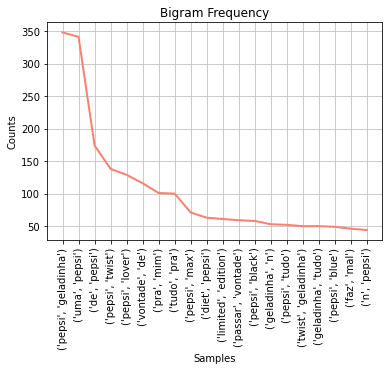

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [17]:
# work on the word frequency count
all_words_pepsi_ini = []
# all_words_pepsi = [i+all_words_pepsi_ini for i in new_df_pepsi['tokenized_comments']]
for i in new_df_pepsi['tokenized_comments']:
    all_words_pepsi_ini += i
all_words_pepsi_ini
nlp_words_pepsi = nltk.FreqDist(all_words_pepsi_ini)
plot2 = nlp_words_pepsi.plot(20, color='salmon', title='Word Frequency - pepsi')


bigrm = list(nltk.bigrams(all_words_pepsi_ini))
words_pepsi = nltk.FreqDist(bigrm)
words_pepsi.plot(20, color='salmon', title='Bigram Frequency')

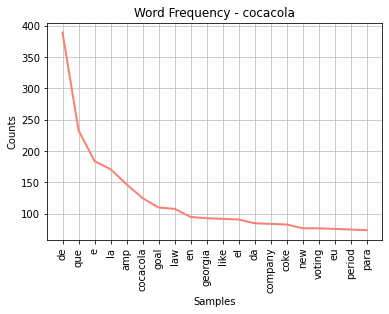

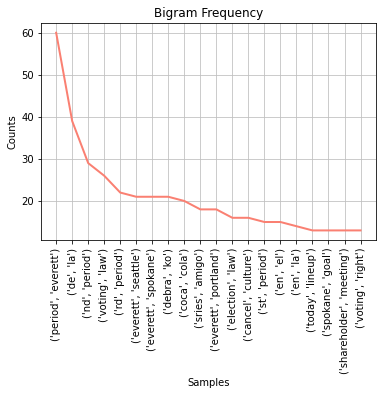

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [18]:
# work on the word frequency count
all_words_cocacola_ini = []
# all_words_pepsi = [i+all_words_pepsi_ini for i in new_df_pepsi['tokenized_comments']]
for i in new_df_cocacola['tokenized_comments']:
    all_words_cocacola_ini += i
all_words_cocacola_ini
nlp_words_cocacola = nltk.FreqDist(all_words_cocacola_ini)
plot3 = nlp_words_cocacola.plot(20, color='salmon', title='Word Frequency - cocacola')

bigrm = list(nltk.bigrams(all_words_cocacola_ini))
words_cocacola = nltk.FreqDist(bigrm)
words_cocacola.plot(20, color='salmon', title='Bigram Frequency')

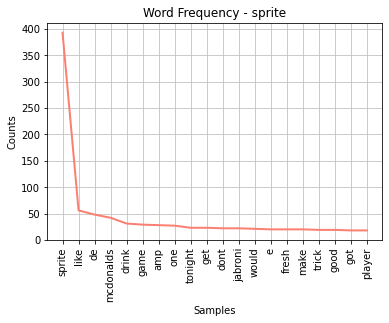

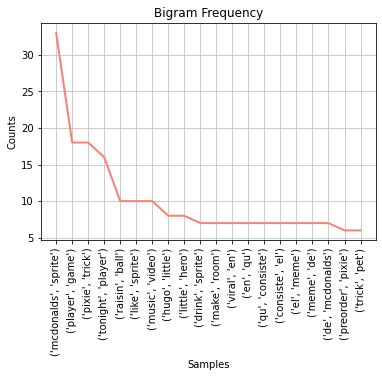

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [19]:
# work on the word frequency count
all_words_sprite_ini = []
# all_words_pepsi = [i+all_words_pepsi_ini for i in new_df_pepsi['tokenized_comments']]
for i in new_df_sprite['tokenized_comments']:
    all_words_sprite_ini += i
all_words_sprite_ini
nlp_words_sprite = nltk.FreqDist(all_words_sprite_ini)
plot4 = nlp_words_sprite.plot(20, color='salmon', title='Word Frequency - sprite')

bigrm = list(nltk.bigrams(all_words_sprite_ini))
words_sprite = nltk.FreqDist(bigrm)
words_sprite.plot(20, color='salmon', title='Bigram Frequency')

In [20]:
# transformer analysis
dumb = new_df_pepsi[new_df_pepsi["subjectivity"]>0.5].transformer_score.apply(lambda x: x[0]['label'])
print("for pepsi    ",dict(Counter(dumb)))

dumb = new_df_cocacola[new_df_cocacola["subjectivity"]>0.5].transformer_score.apply(lambda x: x[0]['label'])
print("for cocacola ",dict(Counter(dumb)))

dumb = new_df_sprite[new_df_sprite["subjectivity"]>0.5].transformer_score.apply(lambda x: x[0]['label'])
print("for sprite   ",dict(Counter(dumb)))

for pepsi     {'NEGATIVE': 324, 'POSITIVE': 182}
for cocacola  {'POSITIVE': 180, 'NEGATIVE': 214}
for sprite    {'NEGATIVE': 89, 'POSITIVE': 51}
